### Main for Loss analysis
Author: Jiajun Du, 2022

In [1]:
# import library
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
from FragilityData import Data

In [2]:
# IMs: 0.175 0.425 0.675 0.925 1.175 1.425 1.675 1.925
# POC: 0       0     0    1     3     16     40    67
# IMs = np.arange(0.175,2.175,0.25)
# Poc = np.array([0, 0, 0, 1, 3, 16, 40, 67])
# 只需更改：
IM = 1.925
Poc = 67

edp_data = pd.read_excel('edp_matrix_%s.xlsx' % (str(IM)), index_col=0)
EDP = edp_data.to_numpy()
# EDP
# idr1 idr2 idr3 a0 a1 a2 a3 ridr

# collapse or not

# generate 10000 random numbers
Initial_realizations = np.random.randint(1,101,10000)
Collpase_index = Initial_realizations <= Poc
Nocollapse_index = Initial_realizations > Poc
EDP_NC = EDP[Nocollapse_index]   # 找出没有倒塌的Realizations

rows, cols = np.shape(EDP_NC)

# 计算被判定为倒塌的Realization的耗费
ReplacementCost = 9954000
# 被判定为倒塌的Realizaitons 的数量
num_collapse = 10000 - rows
# 初始化费用矩阵
Cost_matrix = np.zeros(10000)
Cost_matrix[:num_collapse] = ReplacementCost #将重置成本填入Cost_matrix

# Instantiate data class
data = Data()

(array([ 789., 1062.,   51.,    0.,    0.,    0.,    0.,    0.,    0.,
        8098.]),
 array([ 117177.95472125, 1100860.15924913, 2084542.363777  ,
        3068224.56830488, 4051906.77283275, 5035588.97736063,
        6019271.1818885 , 7002953.38641638, 7986635.59094425,
        8970317.79547212, 9954000.        ]),
 <BarContainer object of 10 artists>)

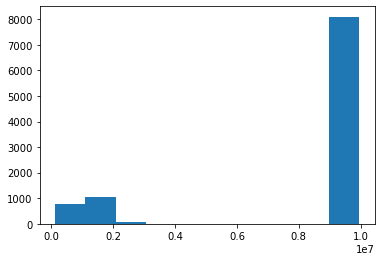

In [3]:
# 遍历每一次 Realization
for i in range(rows):
    # max_ridr
    max_ridr = EDP_NC[i,-1]
    objPercent = data.get_prob_resi(max_ridr)
    RIDR_realizations = np.random.randint(1,101,1)
    # NR_index = RIDR_realizations <= objPercent
    # R_index = RIDR_realizations > objPercent
    if RIDR_realizations <= objPercent:
        # 不可以修复，按照倒塌计算
        Cost_matrix[num_collapse+i] = ReplacementCost
    elif RIDR_realizations > objPercent:
        # 可以修复
        IDR = EDP_NC[i,:3]
        PFA = EDP_NC[i,3:7]
        frameCost, sframeCost, nframeCost, cframeCost = data.cal_repair(IDR, PFA)
        Cost_matrix[num_collapse+i] = frameCost

# 结果
plt.hist(Cost_matrix)

In [4]:
a = Cost_matrix[Cost_matrix<9954000]

(array([ 3.,  2.,  2.,  2.,  4.,  5.,  7.,  7.,  8.,  9., 13., 17., 17.,
        16., 16., 27., 19., 28., 29., 24., 16., 25., 26., 30., 27., 22.,
        32., 28., 24., 33., 28., 35., 28., 32., 36., 33., 45., 39., 33.,
        31., 36., 38., 38., 33., 38., 35., 38., 45., 32., 33., 42., 33.,
        34., 35., 38., 31., 35., 36., 26., 41., 35., 17., 21., 27., 25.,
        12., 25., 24., 23., 17., 11.,  7., 11., 10.,  9.,  4.,  3.,  7.,
         5.,  3.,  3.,  9.,  5.,  3.,  3.,  1.,  1.,  1.,  0.,  1.,  1.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 117177.95472125,  143178.76033389,  169179.56594653,
         195180.37155916,  221181.1771718 ,  247181.98278443,
         273182.78839707,  299183.59400971,  325184.39962234,
         351185.20523498,  377186.01084762,  403186.81646025,
         429187.62207289,  455188.42768553,  481189.23329816,
         507190.0389108 ,  533190.84452344,  559191.65013607,
         585192.45574871,  611193.26136135,  637194.06697398,


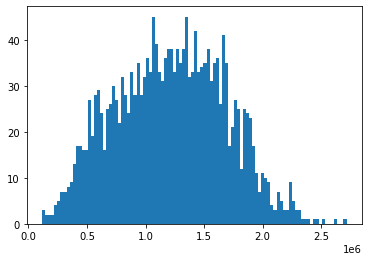

In [5]:
plt.hist(a,bins=100)

In [6]:
# 计算给定列表中值的超越概率
#  data => 计算出来的损失矩阵； obj_list => 目标值，横坐标
def cal_prob_ec_list(data, obj_list):
    probList = []
    for i in range(len(obj_list)):
        if len(data) == 0:
            probList.append(0)
        else:
            probList.append(cal_prob_ec(data, obj_list[i]))
    return probList

# 计算列表中给定值的超越概率
def cal_prob_ec(data, obj):
    data = np.sort(data)  # 从小到大排序
    if obj >= data[-1]:
        per = 0
    else:
        data = np.append(data, obj)
        data = np.sort(data)
        per = search_obj(data, obj)
    return per * len(data) / 10000

# 搜索目标值区域
def search_obj(data, obj):
    left = 0
    right = len(data) - 1
    while right >= left:
        mid = (left+right)//2
        if obj > data[mid]:
            left = mid + 1
        elif obj < data[mid]:
            right = mid - 1
        else:
            return (len(data)-1-mid)/(len(data)-1)
    else:
        return -1



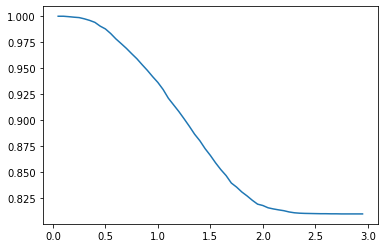

In [7]:
objList = [0.05*i for i in range(1,60)]
y = cal_prob_ec_list(Cost_matrix/1e6,objList)
plt.plot(objList, y)


In [8]:
# IMs = np.arange(0.175,2.175,0.25)


In [9]:
# from tkinter import PROJECTING
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# IMs = np.arange(0.175,2.175,0.25)

# # 构造需要显示的值
# # IMs = np.arange(0.175,2.175,0.25)
# X = IMs
# Y = objList
# Z = np.zeros(shape = (len(X),len(Y)))
# # 设置每一个（X，Y）对应的Z轴坐标
# Z[0,:] = y

# xx, yy = np.meshgrid(X,Y)  # 网格化坐标
# X, Y = xx.ravel(), yy.ravel() # 矩阵扁平化
# bottom = np.zeros_like(X)
# Z = Z.ravel() # 

# width = height = 0.1

# #绘图设置
# fig = plt.figure()
# ax = fig.gca(projection = '3d')
# ax.bar3d(X, Y, bottom, width, height, Z, shade = True)

# # 坐标轴设置
# ax.set_xlabel('Sa')
# ax.set_ylabel('Repair Cost')
# ax.set_zlabel('AoE')

In [10]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# import numpy as np



# fig = plt.figure()
# ax = fig.gca(projection='3d')
 
# # Make data.
# X = IMs
# Y = objList
# Z = np.zeros(shape = (len(Y),len(X)))
# for i in range(len(X)):
#     Z[:,i] = y

# X, Y = np.meshgrid(X, Y)

# # 设置每一个（X，Y）对应的Z轴坐标

# # Z = X**2 + Y**2
# # Z = Z.tolist()


# # Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# # Customize the z axis.
# # ax.set_zlim(-1.01, 1.01)
# # ax = fig.add_axes(MyAxes3D(ax, 'l'))
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
 
# # Add a color bar which maps values to colors.
# # fig.colorbar(surf, shrink=0.5, aspect=5)

# # 坐标轴设置
# ax.set_xlabel('Sa')
# ax.set_ylabel('Repair Cost')
# ax.set_zlabel('AoE')
# ax.set_zticks([0,0.25,0.5,0.75,1])

# plt.show()

In [11]:
re = np.asarray(y).reshape(59,1)
data = pd.DataFrame(re)
writer = pd.ExcelWriter('re.xlsx')
data.to_excel(writer,'MRF_LA')
writer.save()
writer.close()

c:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
